# Loading Data..

In [9]:
import pandas as pd

speech = pd.read_csv('5.csv')
emotiono = pd.read_csv('emotion.csv')
gaze = pd.read_csv('gaze.csv')


# Analyzing the Speech Dataset


## Descriptive Statistics

The Three most Dominant emotions are:
positive:  0.63
confident:  0.59
hesitant:  0.46


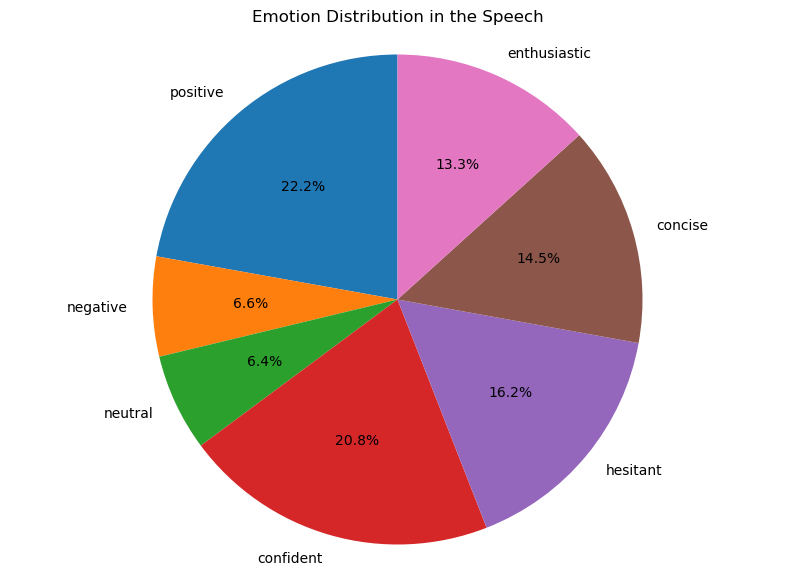

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

emotions = speech.columns[10:-1]
avg = speech[emotions].mean()

top3 = avg.sort_values(ascending = False).head(3)
print('The Three most Dominant emotions are:')
for emo , val in top3.items():
    print(f"{emo}: {val: .2f}")
    

plt.figure(figsize = (10 , 7))
plt.pie(avg , labels = avg.index , autopct ='%1.1f%%' , startangle = 90)
plt.title('Emotion Distribution in the Speech')
plt.axis('equal')
plt.show()

We can see the Three most dominant emotions depicted by the person.

## Trend Analysis

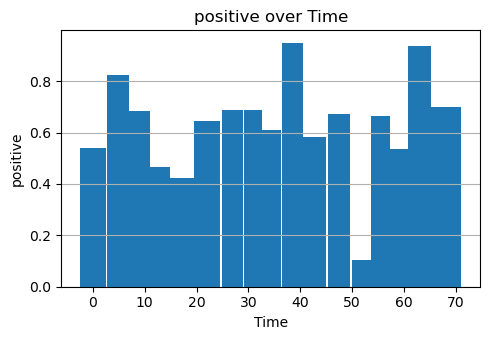

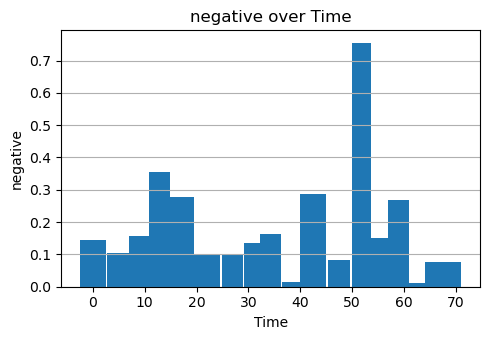

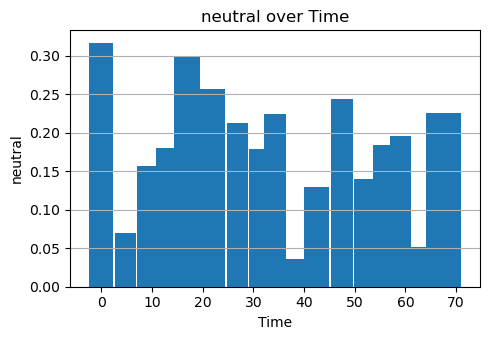

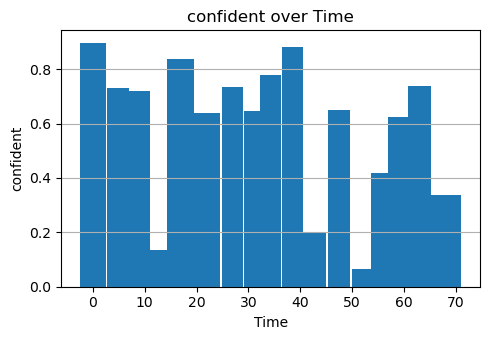

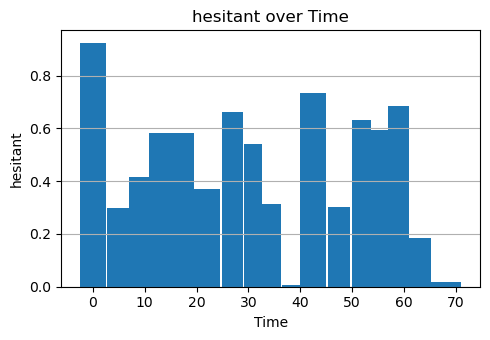

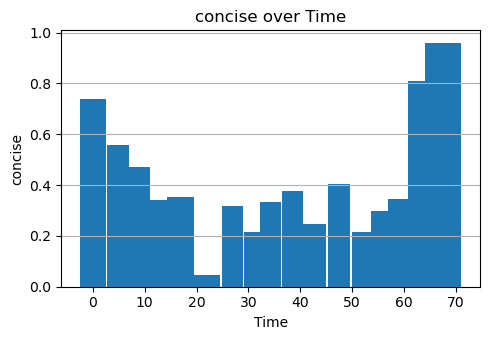

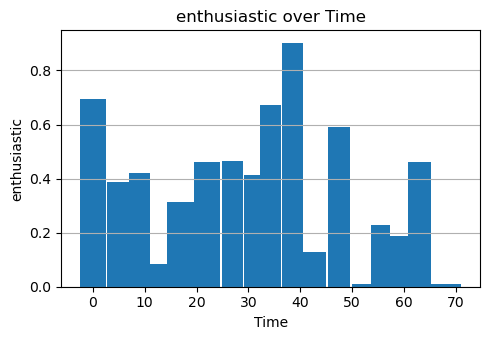

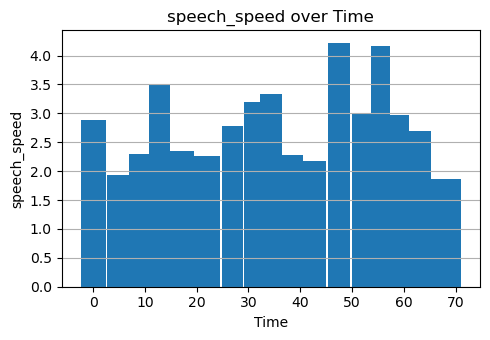

In [3]:

columns = speech.columns[10:]
for column in columns :
    plt.figure(figsize = (5 , 3.5))
    plt.bar(speech['start'] , speech[column] , width = (speech['end'] - speech['start']))
    
    plt.title(f'{column} over Time')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(axis = 'y')
    plt.tight_layout()
    plt.show()

INFERENCES BASED ON THE ABOVE GRAPHS:

1. The tone of Person1 is positive consistently throughout the speech except at a single point when the person talks about his/her idea of using AI to help students with neurodevelopmental disorder like ADHD. 

2. The person sound confident on average except at points where they talk about their certification courses.

3. There is also a dip in confidence when they talk about their idea of use of AI in betterment of students with neurological orders.

4. Less Hesistance is observed througout the speech.

5. Very low values of Concisness are observed throughout the speech.

6. The person sounds a little less enthusiastic throughout, except when they about winning an international art competition for which they are proud of themselves.


## Correlation Analysis

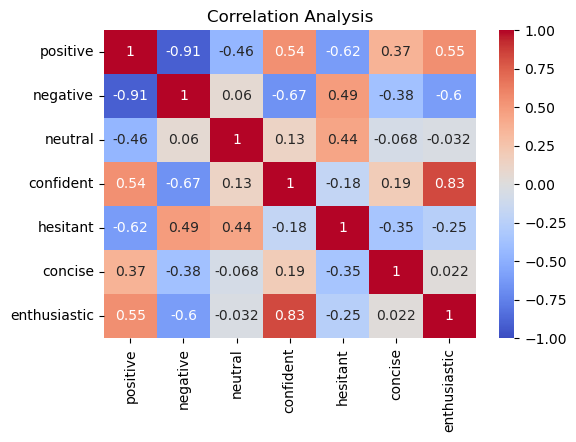

In [5]:
import seaborn as sns
selected = speech.columns[10:-1]
df = speech[selected]
corr = df.corr()

plt.figure(figsize = (6 , 4))
sns.heatmap(corr , annot = True , cmap = 'coolwarm' , vmin = -1 , vmax = 1)
plt.title("Correlation Analysis")
plt.show()

This heat map gives the correlation between emotions where strong correalations are generally (> 0.75 or < -0.75) and these strong correlations can be used to make inferences

# Analyzing the Emotion Dataset

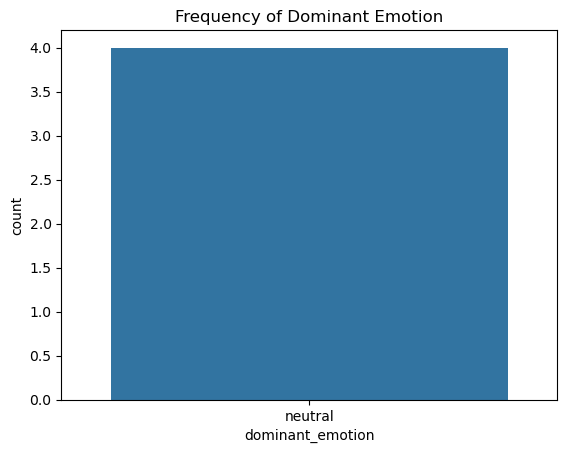

The most dominant emotion is 'neutral' with a count of 4.


In [6]:
sns.countplot(data = emotiono , x = 'dominant_emotion')
plt.title('Frequency of Dominant Emotion')
plt.show()

emotion_counts = emotiono['dominant_emotion'].value_counts()
max_emotion = emotion_counts.idxmax()
max_count = emotion_counts.max()

print(f"The most dominant emotion is '{max_emotion}' with a count of {max_count}.")

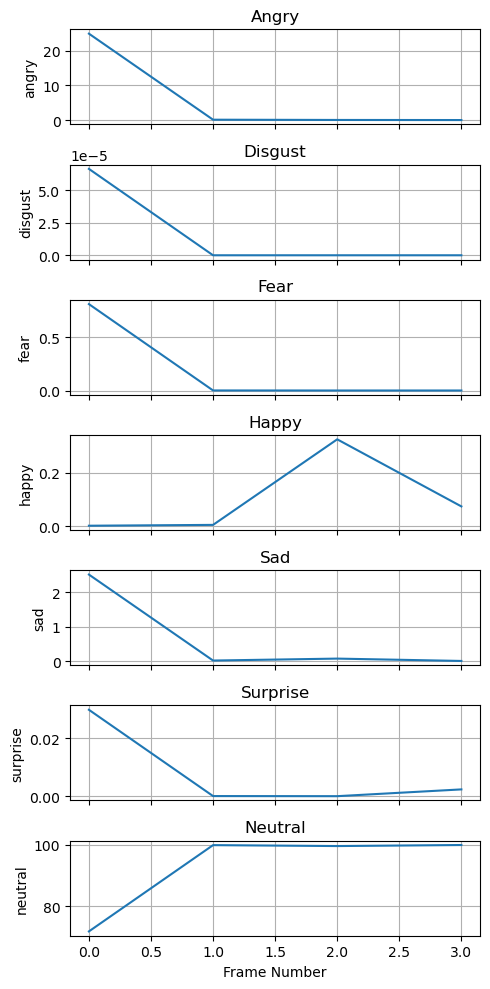

In [7]:
emotion_columns = emotiono.columns[2:-1]
fig, axes = plt.subplots(nrows=len(emotion_columns), figsize=(5 , 10), sharex=True)

x_range = range(len(emotiono))

for ax, emotion_col in zip(axes, emotion_columns):
    ax.plot(x_range, emotiono[emotion_col], label=emotion_col)
    ax.set_ylabel(emotion_col)
    ax.grid(True)
    ax.set_title(emotion_col.capitalize())

plt.xlabel('Frame Number')
plt.tight_layout()
plt.show()

Due to less data being provided on the given person , not much inferences can be made about their emotion dataset except for the fact that the dominant emotion is neutral.

## Analyzing the Gaze Dataset


In [8]:
print(f"Percentage of frames with eye contact: {gaze['gaze'].mean() * 100:.2f}%")
print(f"Percentage of frames with blinks: {gaze['blink'].mean() * 100:.2f}%")

Percentage of frames with eye contact: 100.00%
Percentage of frames with blinks: 25.00%


Given that the speaker maintains eye contact in 100% of the frames, they exhibit exceptional confidence and sustained engagement with the audience. The 25% blink rate, however, is notably high, suggesting the speaker might be experiencing heightened emotions, stress, or intense concentration. Despite unwavering eye contact, the frequent blinking could be a telltale sign of underlying nerves or emotional processing.

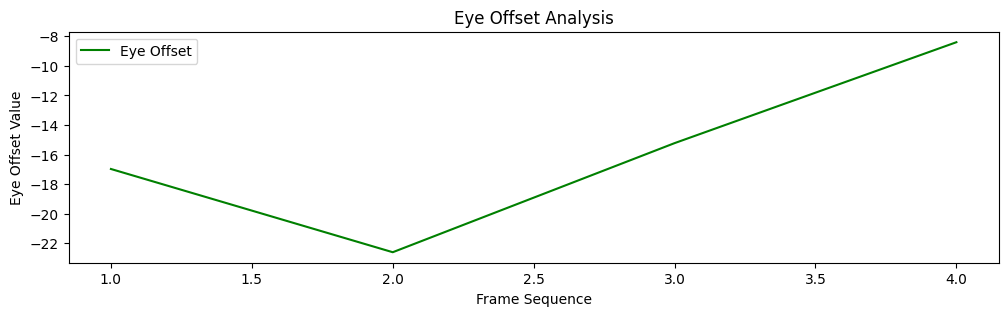

In [8]:
plt.figure(figsize=(12,3))
plt.plot(gaze['image_seq'], gaze['eye_offset'], label='Eye Offset', color='green')
plt.xlabel('Frame Sequence')
plt.ylabel('Eye Offset Value')
plt.title('Eye Offset Analysis')
plt.legend()
plt.show()

Less data on the given person makes it a little difficult to analyze the eye offset values.

# Overall Summary

Person1 is generally positive and confident in their speech but wavers when discussing AI's role in aiding neurodevelopmental disorders. They rarely hesitate but often lack conciseness. Enthusiasm is evident when mentioning an art competition victory. With a dominant 'neutral' emotion, their speech leans factual. Impressively, they maintain 100% eye contact, yet a 25% blink rate hints at underlying stress. Sparse data limits further eye pattern analysis.